# Plant Seedlings Classification Project
##### Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

##### Objective:
Determine the species of a seedling from an image,
while implementing the techniques learnt as a part of the course.


1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
from glob import glob
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd

In [3]:
#Images=np.load('images.npy') # to run this thing in my computer
Images=np.load('/content/drive/My Drive/DLCP/images.npy')   #To run this thing in colab


In [4]:
Images.shape    # Print shape of X

(4750, 128, 128, 3)

In [5]:
#trainLabel = pd.DataFrame(trainLabel)
Labels = pd.read_csv('/content/drive/My Drive/DLCP/Labels.csv')

In [6]:
Labels.shape  # print shape of y

(4750, 1)

In [7]:
Labels.head() # need to hot encode the Labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


AxesSubplot(0.125,0.125;0.775x0.755)


Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

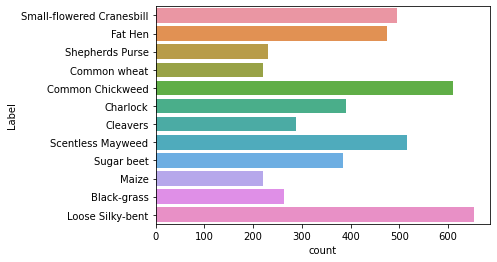

In [8]:
# Taking a look at the output variable "Labels"
y = Labels["Label"] # array for ploting 
print(sns.countplot(y=Labels['Label']))
Labels.Label.value_counts()

In [9]:
# There are 12 diferent labels and are not balanced
# Hence, to improve model accuracy we could use stratification in the data split 

In [10]:
Labels.isnull().isnull().sum() # No null values

Label    0
dtype: int64

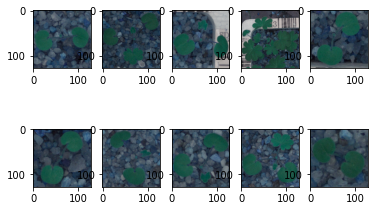

In [11]:
# Visualize the first 10 images
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(Images[i])

But I want to see how different look the seedlings

In [12]:
# locate the different seedlings
dfl=[y[1]]
inx=[0]
for i in range(1,len(y)):
  if i<4748:
     if y[i] != y[i+1]:
            dfl.append(y[i+1])
            inx.append(i+1)
plt.rcParams["figure.figsize"] = (12,12)

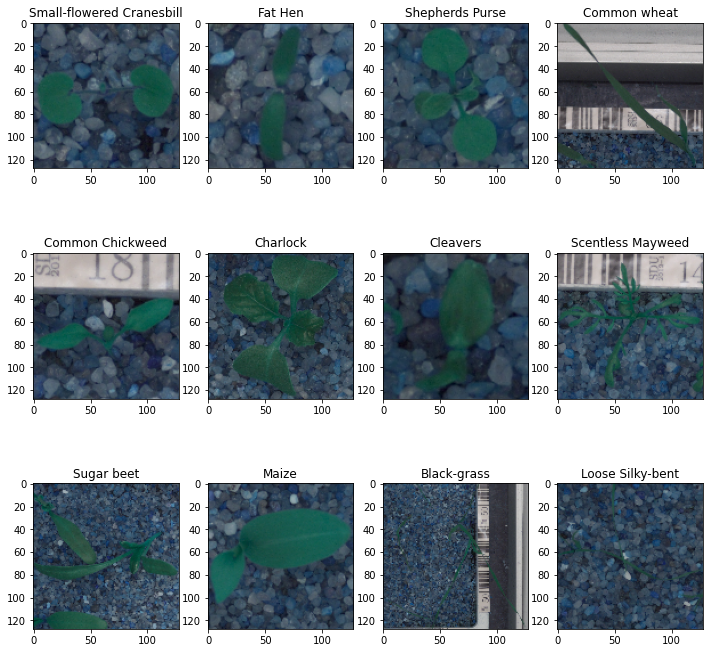

In [13]:
fig, axs = plt.subplots(3, 4) # Showing 1 image of each different seedling:
c=0
#plt.rcParams["figure.figsize"] = (12,12)
for i in range(3):
    for j in range(4):
        axs[i,j].imshow(Images[inx[c]])
        axs[i,j].set_title(dfl[c])
        c=c+1

2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.


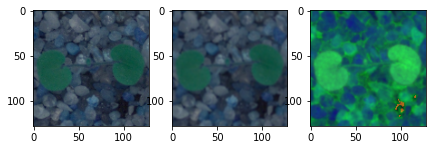

In [14]:
# applying several technics, in this first pass , using Bluring and swaping the colors to HSV format
# I found that we could run the model with >.75 of accuracy using only bluring, but improved a little if converted to HSV
clearImg = []; examples = []; primgs = True
for img in Images:
    blured = cv2.GaussianBlur(img, (3, 3), 0)   # Bluring the image to remove noise   
    convHSV = cv2.cvtColor(blured, cv2.COLOR_BGR2HSV)  # convert to HSV 
    clearImg.append(convHSV)  # Create X dataset to be used downstream 
    if primgs:   # print first image at each stage after pre-processing:
        plt.subplot(1, 5, 1); plt.imshow(img)  # show the original image
        plt.subplot(1, 5, 2); plt.imshow(blured)  # show same but Blured image
        plt.subplot(1, 5, 3); plt.imshow(convHSV)  # show image converted tyo HSV
        primgs = False

In [15]:
# Normalizing the data and defining X (input data)
X=np.asarray(clearImg)
X=X/255

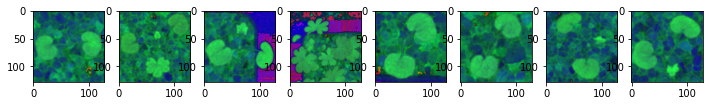

In [16]:
# Show samples of normalized result after pre-processing
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X[i])

3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.


In [17]:
# Define y variable
## Generating dummies:
Y = pd.get_dummies(y, drop_first=False)

In [18]:
# printing the first row of the encoded Y array
print (Y.head(1).transpose())   # Transposed to see the seedlings names more easily
Y.shape

                           0
Black-grass                0
Charlock                   0
Cleavers                   0
Common Chickweed           0
Common wheat               0
Fat Hen                    0
Loose Silky-bent           0
Maize                      0
Scentless Mayweed          0
Shepherds Purse            0
Small-flowered Cranesbill  1
Sugar beet                 0


(4750, 12)

In [19]:
X=np.asarray(X) #  Ensure the data is in array form, so that is compatible with the keras models
y=np.asarray(Y)

In [20]:
# Split training  and test data as per instructions: (30% for testing and then out of that separate 50% for validation)
from sklearn.model_selection import train_test_split
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, train_size=0.7, random_state=33)#, stratify = y)      <-- Tried stratify but reduced the accuracy
# Split Test and validation data:
Xvalid, Xtest, yvalid, ytest = train_test_split(Xtemp, ytemp, train_size=0.5, random_state=33)#,stratify = ytemp)

In [21]:
# Print the shapes of splitted data:
print('Trainig shapes    -  X: ',Xtrain.shape, ' , y: ',ytrain.shape)
print('Testing shapes    -  X: ',Xtest.shape, ' ,  y: ',ytest.shape)
print('Validation shapes -  X: ',Xvalid.shape, ' ,  y: ',yvalid.shape)

Trainig shapes    -  X:  (3325, 128, 128, 3)  , y:  (3325, 12)
Testing shapes    -  X:  (713, 128, 128, 3)  ,  y:  (713, 12)
Validation shapes -  X:  (712, 128, 128, 3)  ,  y:  (712, 12)


In [22]:
# Out of the original data, I splitted 70% for training, 15% for validation and 15% for testing

As I'm going to use the validation split when fitting the model I referred to the documentation:

validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.

In [23]:
# so , I will add the 712 samples of the validation data back to the 3325 Training data 
# which is equivalent to using the original X and split only 85% =4037 samples
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.85, random_state=33)#, stratify = y)      <-- Tried stratify but reduced the accuracy

In [24]:
# Print the shapes of splitted data:
print('Trainig shapes    -  X: ',Xtrain.shape, ' , y: ',ytrain.shape)
print('Testing shapes    -  X: ',Xtest.shape, ' ,  y: ',ytest.shape)

Trainig shapes    -  X:  (4037, 128, 128, 3)  , y:  (4037, 12)
Testing shapes    -  X:  (713, 128, 128, 3)  ,  y:  (713, 12)


In [25]:
# Data is compatible with Keras models, size of image (128x128) will be provided to input layer in the model

4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)


In [26]:
import tensorflow as tf     # Import Tensorflow to create the Neural Network model
print(tf.__version__)
# Import additional libraries:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Recall, Accuracy
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from tensorflow.keras import utils

2.3.0


In [27]:
# Creating the model
np.random.seed(33)  # set the seed
# Convolutional Neural Network:
model = Sequential()   # Reshaping data to make it compatible with Keras models:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", input_shape=( 128, 128, 3), activation='relu'))  
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
# ----
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
# ----
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
# ----
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization(axis=3))    # I found that making the layers 'un-even' the model improved
model.add(Dropout(0.1))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
#
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 256)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 256)       1024      
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1

5. Fit and evaluate model and print confusion matrix. (10 Marks)


In [28]:
# compile model using the parameters requested in project description:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [29]:
# Fit the model , using validation of (712/4037=0.1763) split, to comply with 15% of original data
model.fit( x=Xtrain, y=ytrain, batch_size=32, epochs=32, validation_split = 0.1763) # using many (40) epochs to ensure we get stable results

Epoch 1/32
104/104 [==============================] - 13s 129ms/step - loss: 2.2062 - accuracy: 0.3546 - val_loss: 4.7804 - val_accuracy: 0.1334
Epoch 2/32
104/104 [==============================] - 12s 117ms/step - loss: 1.4201 - accuracy: 0.5603 - val_loss: 15.4219 - val_accuracy: 0.1419
Epoch 3/32
104/104 [==============================] - 12s 118ms/step - loss: 1.0374 - accuracy: 0.6677 - val_loss: 10.1256 - val_accuracy: 0.1896
Epoch 4/32
104/104 [==============================] - 12s 118ms/step - loss: 0.8580 - accuracy: 0.7242 - val_loss: 9.4898 - val_accuracy: 0.1643
Epoch 5/32
104/104 [==============================] - 12s 119ms/step - loss: 0.7471 - accuracy: 0.7486 - val_loss: 5.8727 - val_accuracy: 0.2247
Epoch 6/32
104/104 [==============================] - 12s 118ms/step - loss: 0.6325 - accuracy: 0.7856 - val_loss: 2.0458 - val_accuracy: 0.4228
Epoch 7/32
104/104 [==============================] - 12s 117ms/step - loss: 0.5460 - accuracy: 0.8126 - val_loss: 0.7346 - val_

In [30]:
print(model.evaluate(Xtrain, ytrain))  # Evaluate the model on train set
print(model.evaluate(Xtest, ytest))  # Evaluate on test set

127/127 [==============================] - 4s 32ms/step - loss: 0.2238 - accuracy: 0.9321
[0.22376719117164612, 0.932127833366394]
23/23 [==============================] - 1s 37ms/step - loss: 0.6244 - accuracy: 0.8555
[0.6243786215782166, 0.8555399775505066]


Confusion Matrix


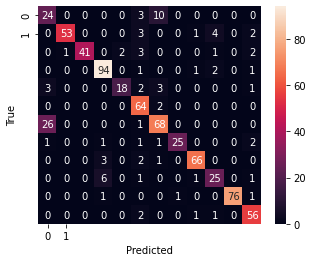

None


In [31]:
plt.rcParams["figure.figsize"] = (5,4)
ypred = model.predict(Xtest)
y_pred = np.argmax(ypred, axis = 1) 
y_true = np.argmax(ytest, axis = 1)
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
print('Confusion Matrix')
print(draw_cm(y_true,y_pred))

Small-flowered Cranesbill and Cleavers


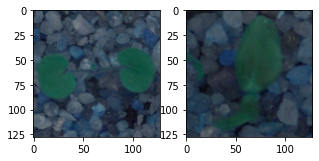

In [32]:
print(dfl[0],'and',dfl[6])
plt.subplot(1, 2, 1); plt.imshow(Images[inx[0]])
plt.subplot(1, 2, 2); plt.imshow(Images[inx[6]])

Seedling 0 (Small-flowered Cranesbill) and 6 (Cleavers) look similar and the model misses to diferentiate them.

6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

 
Prediction for sample  2   is: 7   True= [0 0 0 0 0 0 0 1 0 0 0 0]
Softmax Outputs: [3.0579135e-06 2.2827569e-06 6.1860362e-07 4.0865567e-04 3.0518578e-07
 1.0399121e-07 5.7855100e-08 9.9956614e-01 1.7770907e-06 8.4392482e-08
 3.7984640e-07 1.6567225e-05]
AxesImage(45,36;48.1034x217.44)
 
Prediction for sample  3   is: 7   True= [0 0 0 0 0 0 0 1 0 0 0 0]
Softmax Outputs: [4.0473246e-06 1.9318329e-06 2.0279639e-08 6.2029750e-07 1.4173472e-07
 1.5152477e-06 4.4586642e-08 9.9994218e-01 2.2580905e-05 8.4013173e-08
 1.1525193e-07 2.6745893e-05]
AxesImage(102.724,36;48.1034x217.44)
 
Prediction for sample  33   is: 11   True= [0 0 0 0 0 0 0 0 0 0 0 1]
Softmax Outputs: [9.4960642e-04 7.2780181e-06 4.6489242e-07 2.5322001e-06 3.8415474e-05
 6.3038216e-04 3.8461116e-07 1.9404817e-04 6.4443850e-07 3.1076618e-07
 3.1839559e-07 9.9817562e-01]
AxesImage(160.448,36;48.1034x217.44)
 
Prediction for sample  36   is: 1   True= [0 0 1 0 0 0 0 0 0 0 0 0]
Softmax Outputs: [7.8752717e-05 6.7346066e-01 1.

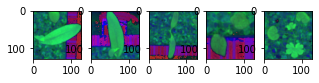

In [33]:
n=0
ypred = model.predict(Xtest)
y_pred = np.argmax(ypred, axis = 1)
for i in (2,3,33,36,59):
    plt.subplot(1, 5, n + 1)
    n=n+1
    print(' ')
    print('Prediction for sample ',i, '  is:', y_pred[i] ,'  True=',ytest[i])
    print("Softmax Outputs:", ypred[i])
    print (plt.imshow(Xtest[i]))

Conclusion: most of these predictions are correct

### SECOND PASS - PERFORM ADDITIONAL PRE-PROCESSING


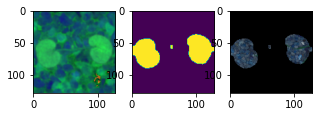

In [36]:
# apply masking and morphological transformation:
clearImg2 = []
examples = []; primgs = True
for cimg in clearImg:
    #blured = cv2.GaussianBlur(cimg, (3, 3), 0)   # Bluring the image to remove noise   
    #convHSV = cv2.cvtColor(blured, cv2.COLOR_BGR2HSV)  # convert to HSV 
    lowHSVgreen = (25, 100, 50)      # Asuming that all plants are green, we create a green mask
    highHSVgreen = (95, 255, 255)
    mask = cv2.inRange(cimg, lowHSVgreen, highHSVgreen)  # use mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11)) # using morphological transformation 
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # The result will look like the outline of the object.
    bMask = mask > 0  # Create boolean mask to further deferentiate the seedling
    clear = np.zeros_like(img, np.uint8)  # add empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    clearImg2.append(clear)  # Append image without backgroung   
    if primgs:   # print images examples at each stage
        plt.subplot(1, 3, 1); plt.imshow(cimg)  # original image
        plt.subplot(1, 3, 2); plt.imshow(bMask)  # Boolean mask image
        plt.subplot(1, 3, 3); plt.imshow(clear)  # background removed image
        primgs = False

In [37]:
# Normalizing the data and defining X (input data)
X=np.asarray(clearImg2)
X=X/255
X=np.asarray(X)  #  (y is still the same from previous run)
y = Labels["Label"] # re-setting the y array
Y = pd.get_dummies(y, drop_first=False)
X=np.asarray(X) #  Ensure the data is in array form, so that is compatible with the keras models
y=np.asarray(Y)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.85, random_state=33)#, stratify = y)      <-- Tried stratify but reduced the accuracy

In [38]:
# Rotating and zooming to see if overfitting is reduced
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(Xtrain)
datagen.fit(Xtest)

In [39]:
# Creating the model again - smaller network
np.random.seed(33)  # set the seed
# Convolutional Neural Network:
model = Sequential()   # Reshaping data to make it compatible with Keras models:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", input_shape=( 128, 128, 3), activation='relu'))  
model.add(BatchNormalization(axis=3))
# ----
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
# ----
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
# ----
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
# ----
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
# ----
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
#
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 512)     14336     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 512)     2048      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 256)     1179904   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 256)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 256)       1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 256)      

In [40]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [41]:
# Fit the model 
model.fit( x=Xtrain, y=ytrain, batch_size=32, epochs=32, validation_split = 0.1763, verbose=1)

Epoch 1/32
104/104 [==============================] - 53s 510ms/step - loss: 2.5382 - accuracy: 0.2683 - val_loss: 11.8441 - val_accuracy: 0.1419
Epoch 2/32
104/104 [==============================] - 49s 472ms/step - loss: 1.9196 - accuracy: 0.3798 - val_loss: 12.2614 - val_accuracy: 0.0604
Epoch 3/32
104/104 [==============================] - 49s 473ms/step - loss: 1.7033 - accuracy: 0.4250 - val_loss: 11.6798 - val_accuracy: 0.1419
Epoch 4/32
104/104 [==============================] - 49s 472ms/step - loss: 1.4613 - accuracy: 0.4953 - val_loss: 12.7769 - val_accuracy: 0.1419
Epoch 5/32
104/104 [==============================] - 49s 473ms/step - loss: 1.3466 - accuracy: 0.5347 - val_loss: 6.9200 - val_accuracy: 0.1461
Epoch 6/32
104/104 [==============================] - 49s 473ms/step - loss: 1.1462 - accuracy: 0.5961 - val_loss: 3.1866 - val_accuracy: 0.2921
Epoch 7/32
104/104 [==============================] - 49s 473ms/step - loss: 1.0760 - accuracy: 0.6138 - val_loss: 1.2733 - va

In [43]:
print(model.evaluate(Xtrain, ytrain))  # Evaluate on train set
print(model.evaluate(Xtest, ytest))  # Evaluate on test set

127/127 [==============================] - 17s 131ms/step - loss: 0.2641 - accuracy: 0.9344
[0.2641353905200958, 0.9343571662902832]
23/23 [==============================] - 3s 150ms/step - loss: 1.1443 - accuracy: 0.7251
[1.1443290710449219, 0.7251051664352417]


Confusion Matrix


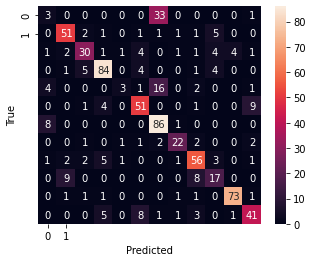

None


In [44]:
plt.rcParams["figure.figsize"] = (5,4)
ypred = model.predict(Xtest)
y_pred = np.argmax(ypred, axis = 1) 
y_true = np.argmax(ytest, axis = 1)
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
print('Confusion Matrix')
print(draw_cm(y_true,y_pred))

Takes aways from the second pass: 
Adding masking and morphological transformation, rotating and zooming , does not necesarily improve the performance of the model , at least for this data set. We got lower (.75 vs .85) accuracy results when compared to the first pass.



In [42]:
# ---------------------------

Final Conclusion:
With Accuracy above .8 in the first pass, this model can be regarded as acceptable. but using hypertuning could be used to increase accuracy.